In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
)
from scipy import stats
from ripple_heterogeneity.utils import custom_plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
# import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator
import os
from scipy import stats
from statannot import add_stat_annotation
from scipy.ndimage import gaussian_filter1d
import warnings
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv", index_col=0)
df = df[df.basepath.str.contains("ORproject")]
df

,basepath,basename
Var1,,
212,Z:\Data\ORproject\OR15\day1,day1
213,Z:\Data\ORproject\OR15\day10,day10
214,Z:\Data\ORproject\OR15\day2,day2
215,Z:\Data\ORproject\OR15\day3,day3
216,Z:\Data\ORproject\OR15\day4,day4
217,Z:\Data\ORproject\OR18\day1,day1
218,Z:\Data\ORproject\OR18\day2,day2
219,Z:\Data\ORproject\OR18\day3,day3
220,Z:\Data\ORproject\OR21\day2,day2


In [21]:
basepath = r"Z:\Data\ORproject\OR15\day1"
position_df = loading.load_animal_behavior(basepath)
position_df

,time,x,y,z,linearized,units,projected_x,projected_y,sr,timestamps,speed,acceleration,states,epochs,environment
0,2.79925,NaN,NaN,19.3239,NaN,cm,NaN,NaN,119.760479,2.79925,5.304503,0.000000,NaN,OR15day1_1_180116_095729,wmaze
1,2.80755,NaN,NaN,19.3147,NaN,cm,NaN,NaN,119.760479,2.80755,5.142359,-0.162144,NaN,OR15day1_1_180116_095729,wmaze
2,2.81590,NaN,NaN,19.3118,NaN,cm,NaN,NaN,119.760479,2.81590,4.897786,-0.244573,NaN,OR15day1_1_180116_095729,wmaze
3,2.82425,NaN,NaN,19.2998,NaN,cm,NaN,NaN,119.760479,2.82425,4.899227,0.001441,NaN,OR15day1_1_180116_095729,wmaze
4,2.83255,NaN,NaN,19.2957,NaN,cm,NaN,NaN,119.760479,2.83255,4.660540,-0.238687,NaN,OR15day1_1_180116_095729,wmaze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455392,9890.38545,NaN,NaN,NaN,NaN,cm,NaN,NaN,119.760479,9890.38545,NaN,NaN,NaN,OR15day1_2_180116_171020,wmaze
455393,9890.39375,NaN,NaN,NaN,NaN,cm,NaN,NaN,119.760479,9890.39375,NaN,NaN,NaN,OR15day1_2_180116_171020,wmaze
455394,9890.40210,NaN,NaN,NaN,NaN,cm,NaN,NaN,119.760479,9890.40210,NaN,NaN,NaN,OR15day1_2_180116_171020,wmaze
455395,9890.41045,NaN,NaN,NaN,NaN,cm,NaN,NaN,119.760479,9890.41045,NaN,NaN,NaN,OR15day1_2_180116_171020,wmaze


In [22]:
position_df.states.value_counts()

0.0    191880
1.0    130238
2.0    112690
Name: states, dtype: int64

<AxesSubplot:xlabel='x', ylabel='y'>

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


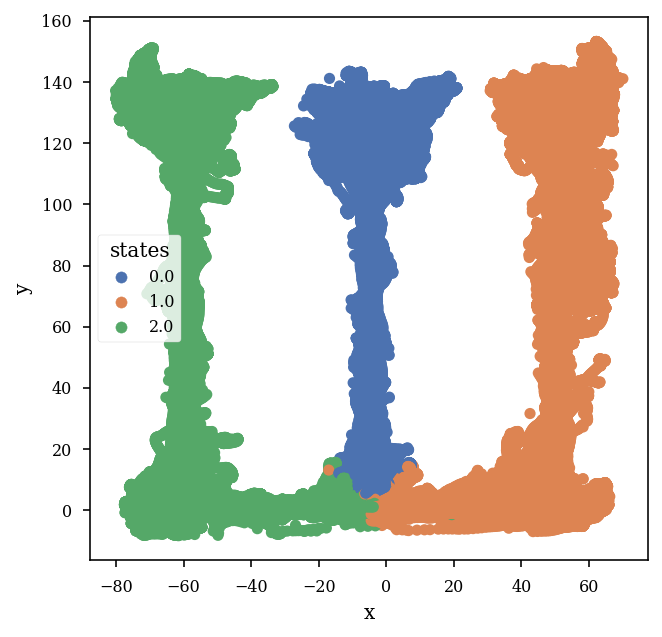

In [23]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="x",y="y",hue="states", data=position_df,palette="deep",linewidth=0)

<AxesSubplot:xlabel='timestamps', ylabel='linearized'>

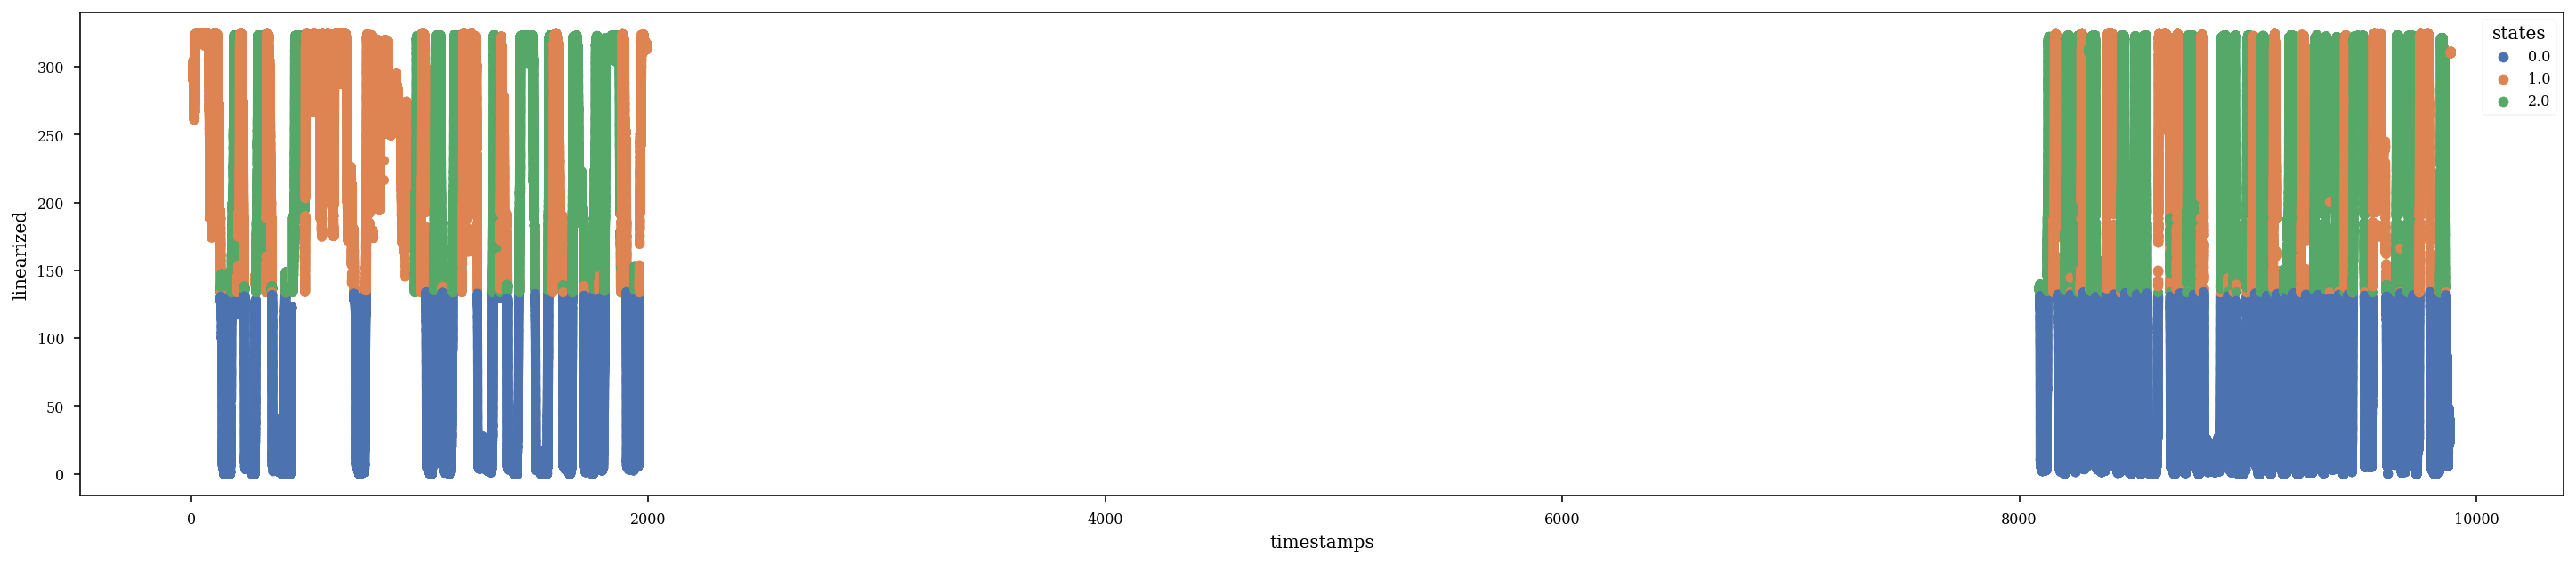

In [24]:
plt.figure(figsize=(25,5))
sns.scatterplot(x="timestamps",y="linearized",hue="states", data=position_df,palette="deep",linewidth=0)
# plt.xlim(0,500)

In [91]:
epochs_df = loading.load_epoch(basepath)
epochs = nel.EpochArray(np.array([epochs_df.startTime, epochs_df.stopTime]).T)
display(epochs_df)
epochs

,name,startTime,stopTime,environment
0,OR15day1_1_180116_095729,0.000,2001.59995,wmaze
1,OR15day1_sleep1_180116_110120,2001.600,8087.29195,sleep
2,OR15day1_2_180116_171020,8087.292,9952.05995,wmaze
3,OR15day1_sleep2_180116_181618,9952.060,19424.00000,sleep


<EpochArray at 0x1d466f27520: 4 epochs> of length 5:23:44 hours

In [191]:
bad_idx = np.isnan(position_df.linearized)
beh_df = position_df[~bad_idx]

pos = nel.AnalogSignalArray(
    data=np.array(position_df.linearized),
    timestamps=position_df.time,
    fs=position_df.sr.iloc[0],
)
pos = pos[epochs[2]]

ts = position_df.query("states==0").timestamps.values
center_epochs = nel.EpochArray(np.array([ts,ts]).T).merge(gap=1)

ts = position_df.query("states==1").timestamps.values
right_epochs = nel.EpochArray(np.array([ts,ts]).T).merge(gap=1)

ts = position_df.query("states==2").timestamps.values
left_epochs = nel.EpochArray(np.array([ts,ts]).T).merge(gap=1)

center_epochs = center_epochs[epochs[2]]
right_epochs = right_epochs[epochs[2]]
left_epochs = left_epochs[epochs[2]]

center_epochs._data = center_epochs.merge(gap=10).data[center_epochs.merge(gap=10).durations > 2]
right_epochs._data = right_epochs.merge(gap=10).data[right_epochs.merge(gap=10).durations > 2]
left_epochs._data = left_epochs.merge(gap=10).data[left_epochs.merge(gap=10).durations > 2]


In [93]:
import warnings
warnings.filterwarnings("ignore")
def find_good_laps(pos, dir_epoch, thres=0.5, binsize=6, min_laps=10):
    """
    find_good_laps: finds good laps in behavior data
        Made to find good laps in nelpy array for replay analysis
    input:
        pos: nelpy analog array with single dim
        dir_epoch: epoch to flip
        thres: occupancy threshold for good lap
        binsize: size of bins to calculate occupancy
    output:
        good_laps: epoch array of good laps
    """
    # make bin edges to calc occupancy
    x_edges = np.arange(np.nanmin(pos.data[0]), np.nanmax(pos.data[0]), binsize)
    # initialize occupancy matrix (position x time)
    occ = np.zeros([len(x_edges) - 1, dir_epoch.n_intervals])
    # iterate through laps
    for i, ep in enumerate(dir_epoch):
        # bin position per lap
        occ[:, i], _ = np.histogram(pos[ep].data[0], bins=x_edges)
    # calc percent occupancy over position bins per lap and find good laps
    good_laps = np.where(~((np.sum(occ == 0, axis=0) / occ.shape[0]) > thres))[0]
    # if no good laps, return empty epoch
    if (len(good_laps) == 0) | (len(good_laps) < min_laps):
        dir_epoch = nel.EpochArray()
    else:
        dir_epoch = dir_epoch[good_laps]
    return dir_epoch

(outbound_epochs, inbound_epochs) = functions.get_linear_track_lap_epochs(
    pos.abscissa_vals, pos.data[0], newLapThreshold=20
)
outbound_epochs = find_good_laps(pos, outbound_epochs)
inbound_epochs = find_good_laps(pos, inbound_epochs)
outbound_epochs, inbound_epochs

(<EpochArray at 0x1d46d75d550: 29 epochs> of length 11:47:344 minutes,
 <EpochArray at 0x1d463e56850: 29 epochs> of length 17:25:443 minutes)

In [94]:
center_right,center_epochs,right_epochs

(<EpochArray at 0x1d46386da30: 34 epochs> of length 47:10:461 minutes,
 <EpochArray at 0x1d463f878b0: 35 epochs> of length 16:15:205 minutes,
 <EpochArray at 0x1d463aa0190: 44 epochs> of length 5:15:074 minutes)

In [110]:
(center_epochs | right_epochs).merge(), (center_epochs + right_epochs)


(<EpochArray at 0x1d45e98f0d0: 77 epochs> of length 21:29:846 minutes,
 <EpochArray at 0x1d45e98fb50: 79 epochs> of length 21:29:846 minutes)

In [189]:
# right_epochs._data

# _data
right_epochs._data = right_epochs.merge(gap=10).data[right_epochs.merge(gap=10).durations > 2]

In [190]:
right_epochs

<EpochArray at 0x1d463aa0190: 12 epochs> of length 5:33:840 minutes

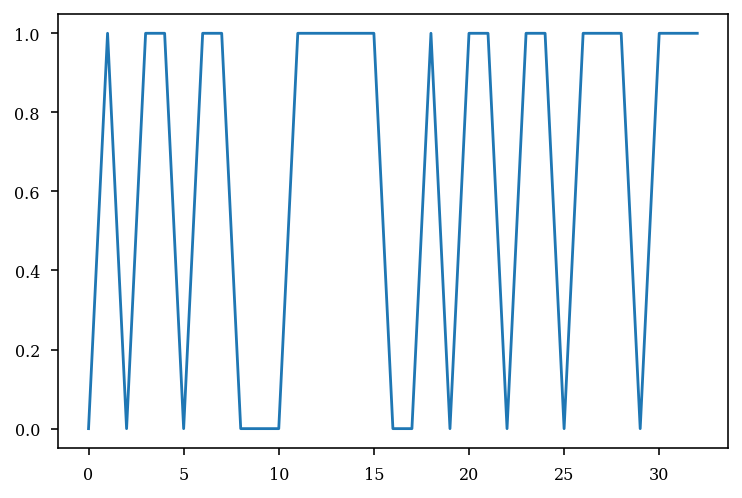

In [187]:
plt.plot(right_epochs.merge(gap=10).durations > 2)
plt.show()

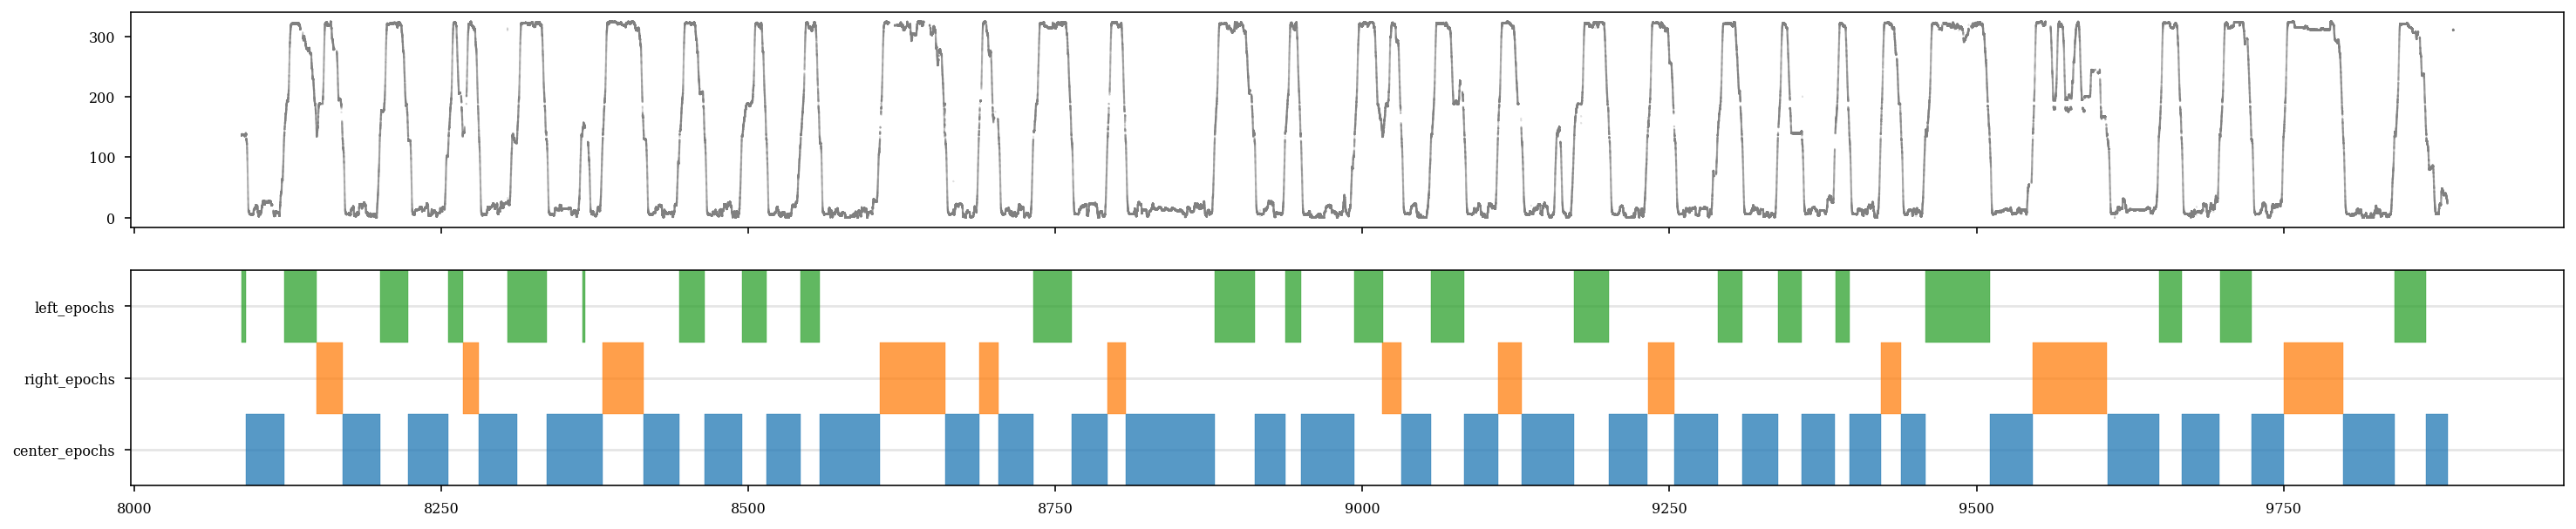

In [192]:
fig, ax = plt.subplots(2, 1, figsize=(25, 5), sharex=True, sharey=False)
ax[0].scatter(pos.abscissa_vals, pos.data, s=1,color='grey',alpha=.2,linestyle="--")

events = []

events.append(center_epochs)
events.append(right_epochs)
events.append(left_epochs)
custom_plots.plot_events(events,['center_epochs','right_epochs','left_epochs'],ax=ax[1])


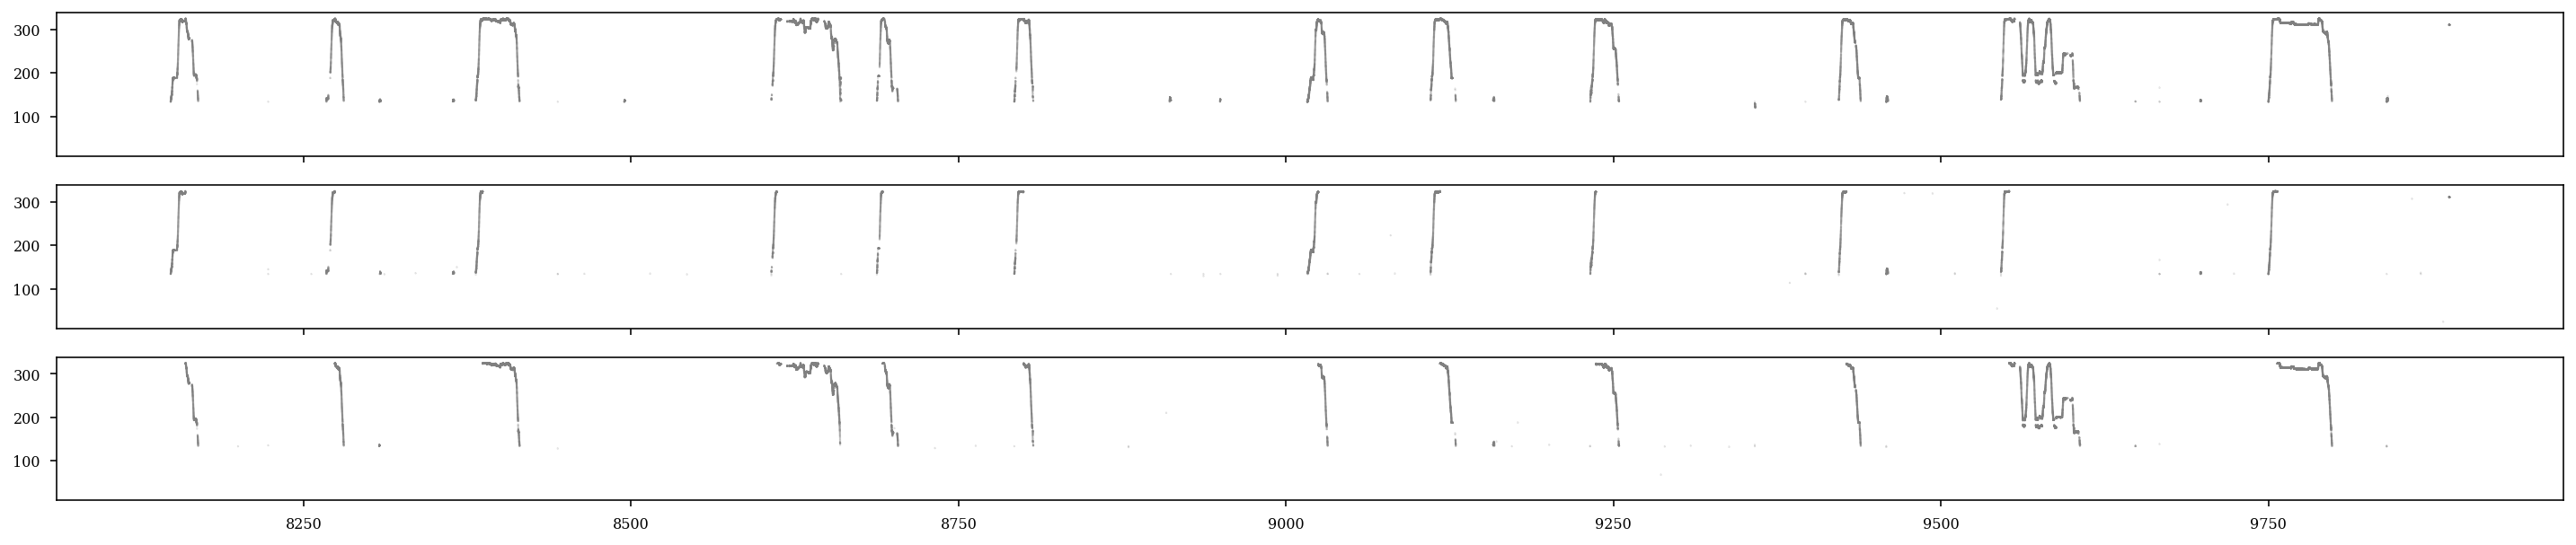

In [147]:
fig, ax = plt.subplots(3, 1, figsize=(25, 5), sharex=True, sharey=True)
ax[0].scatter(pos[right_epochs].abscissa_vals, pos[right_epochs].data, s=1,color='grey',alpha=.2,linestyle="--")

(outbound_epochs, inbound_epochs) = functions.get_linear_track_lap_epochs(
    pos[right_epochs].abscissa_vals,
    pos[right_epochs].data[0],
    newLapThreshold=10,
)
ax[1].scatter(pos[outbound_epochs][~(center_epochs | left_epochs)].abscissa_vals, pos[outbound_epochs][~(center_epochs | left_epochs)].data, s=1,color='grey',alpha=.2,linestyle="--")
ax[2].scatter(pos[inbound_epochs][~(center_epochs | left_epochs)].abscissa_vals, pos[inbound_epochs][~(center_epochs | left_epochs)].data, s=1,color='grey',alpha=.2,linestyle="--")


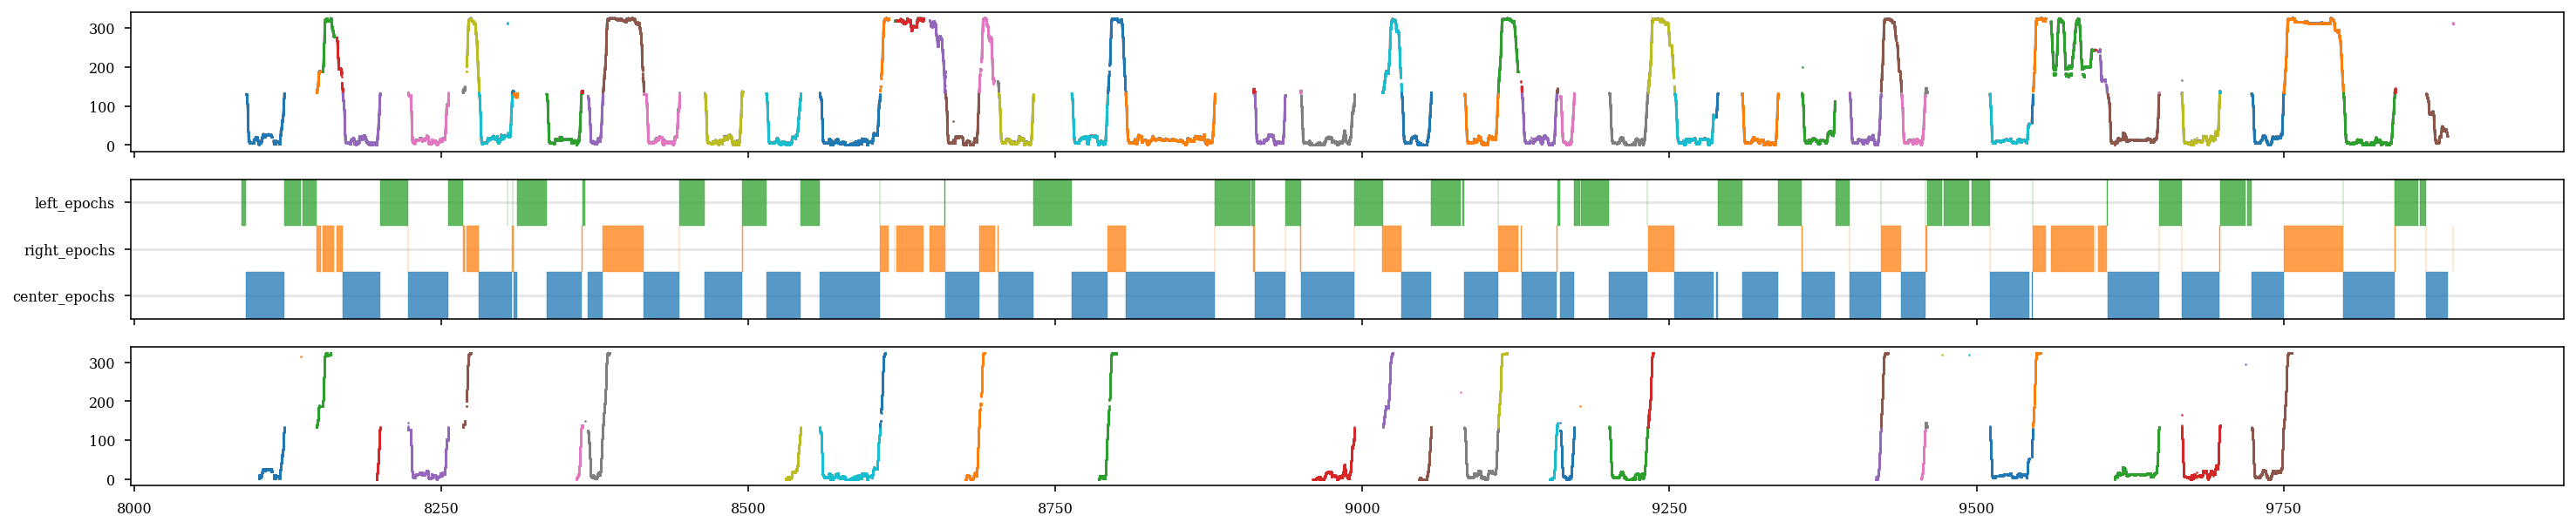

In [141]:
fig, ax = plt.subplots(3, 1, figsize=(25, 5), sharex=True, sharey=False)
center_right = (center_epochs | right_epochs)

ax[0].scatter(pos[center_right].abscissa_vals, pos[center_right].data, s=1,color='grey',alpha=.2,linestyle="--")

for ep in center_right:
    ax[0].scatter(pos[ep].abscissa_vals, pos[ep].data, s=1)

events = []
events.append(center_epochs)
events.append(right_epochs)
events.append(left_epochs)
custom_plots.plot_events(events,['center_epochs','right_epochs','left_epochs'],ax=ax[1])

(outbound_epochs_new, inbound_epochs_new) = functions.get_linear_track_lap_epochs(
    pos[center_right].abscissa_vals,
    pos[center_right].data[0],
    newLapThreshold=10,
)
outbound_epochs_new = find_good_laps(pos[center_right], outbound_epochs_new)

for ep in outbound_epochs_new[~left_epochs]:
    ax[2].scatter(pos[ep].abscissa_vals, pos[ep].data, s=1)


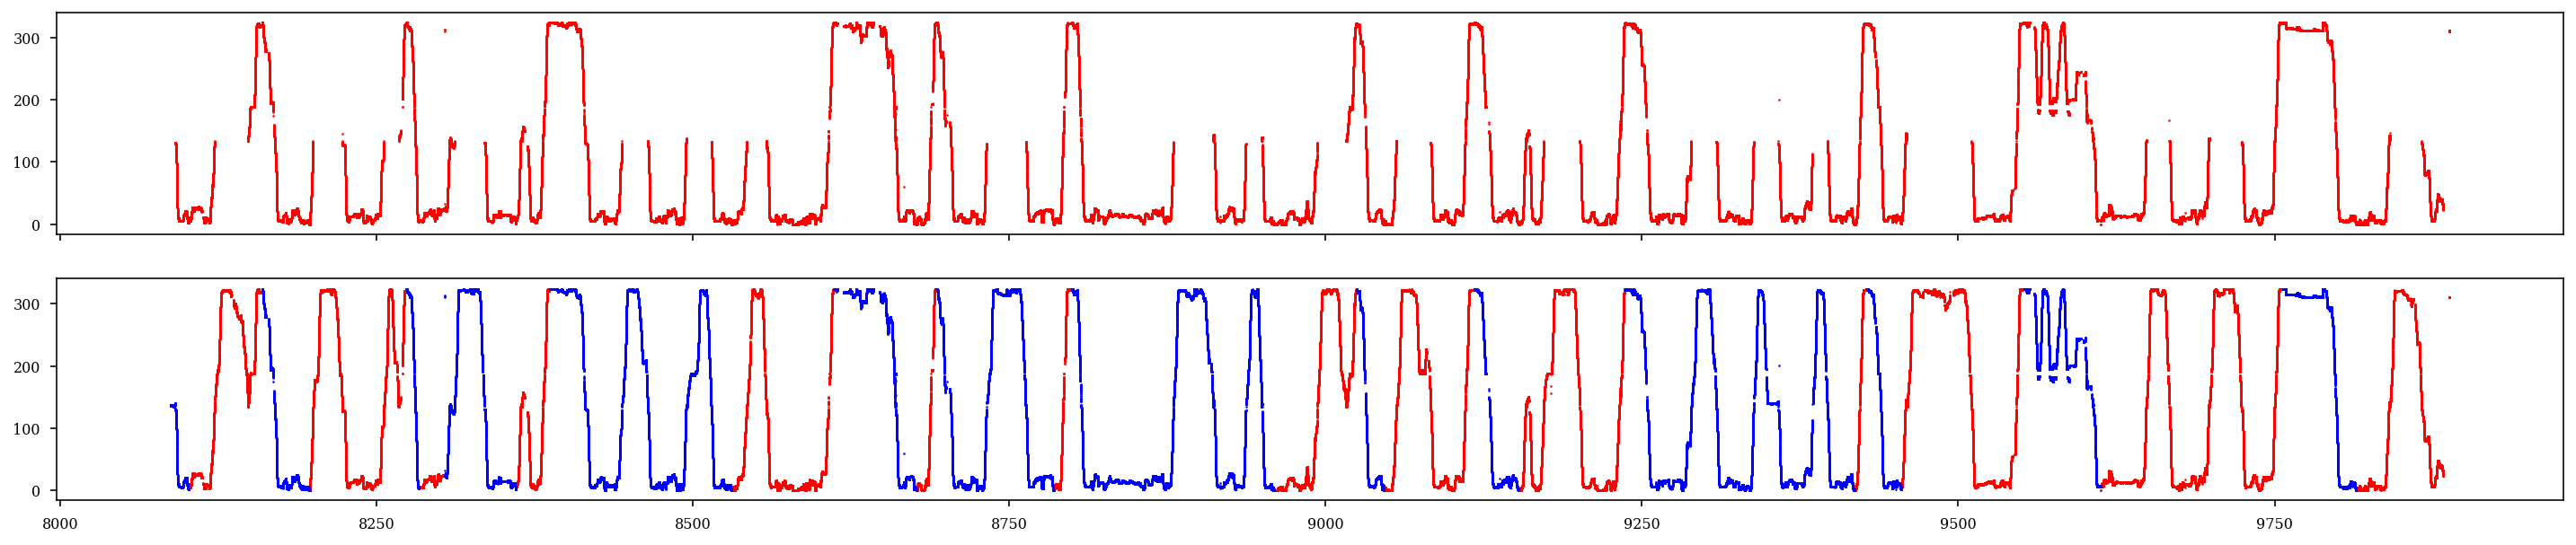

In [82]:
fig,ax = plt.subplots(2,1,figsize=(25,5),sharex=True,sharey=True)
center_right = (center_epochs | right_epochs).merge(gap=5)
# for ep in center_right:
ax[0].scatter(pos[epochs[2]][center_right].abscissa_vals ,pos[epochs[2]][center_right].data,color="red",s=1)

(outbound_epochs_new, inbound_epochs_new) = functions.get_linear_track_lap_epochs(
    pos[center_right].abscissa_vals, pos[center_right].data[0], newLapThreshold=20
)
# outbound_epochs_new = find_good_laps(pos, outbound_epochs_new)
# inbound_epochs_new = find_good_laps(pos, inbound_epochs_new)
ax[1].scatter(pos[epochs[2]][outbound_epochs_new].abscissa_vals ,pos[epochs[2]][outbound_epochs_new].data,color="red",s=1)
ax[1].scatter(pos[epochs[2]][inbound_epochs_new].abscissa_vals ,pos[epochs[2]][inbound_epochs_new].data,color="blue",s=1)


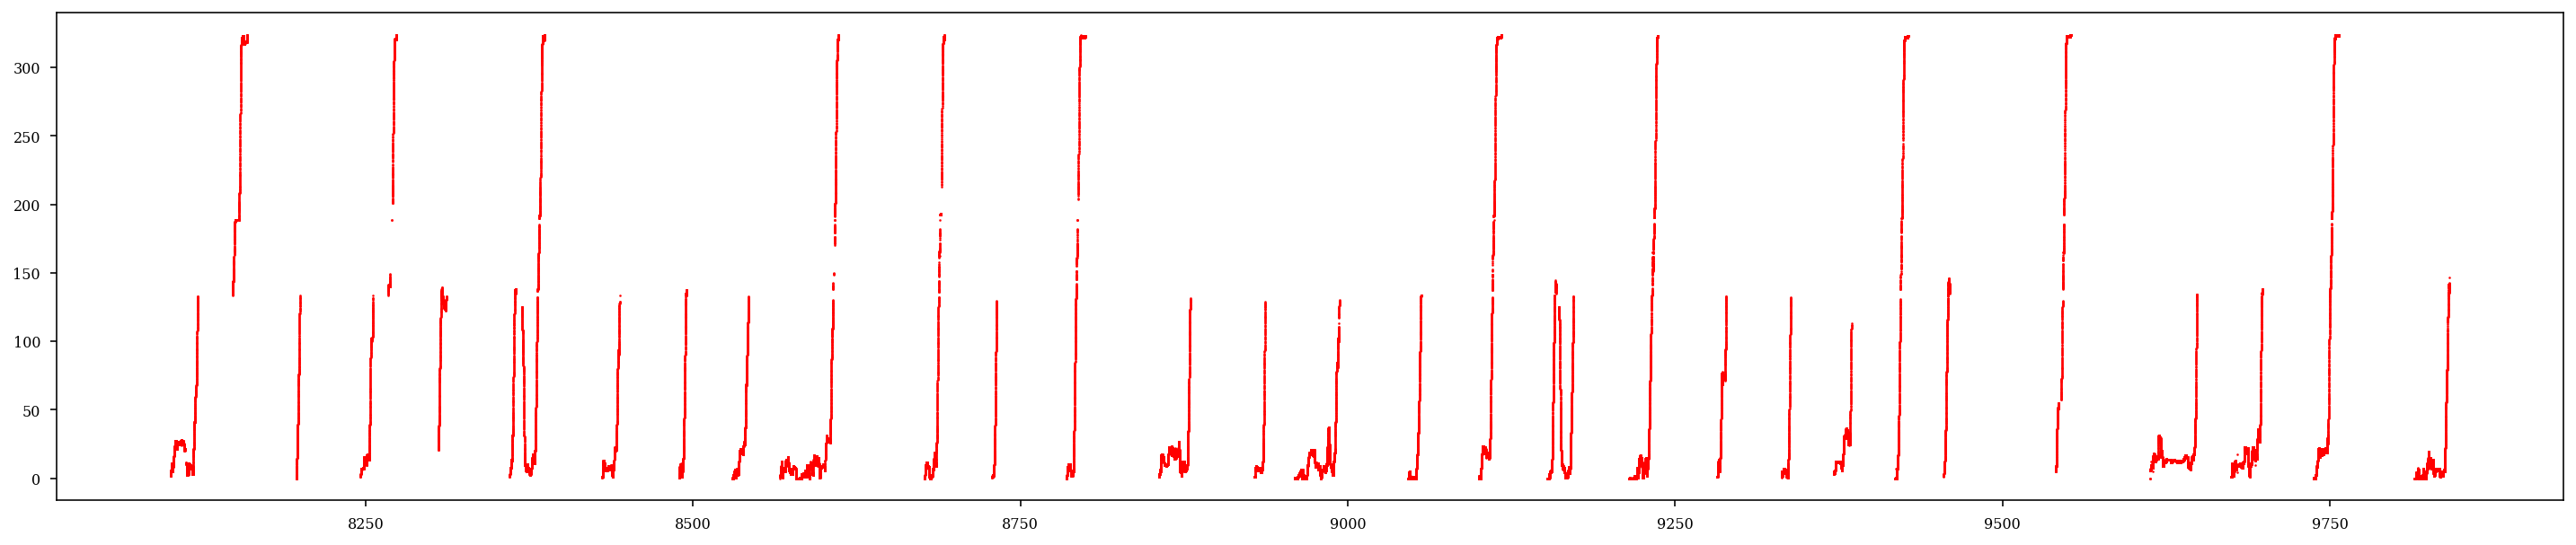

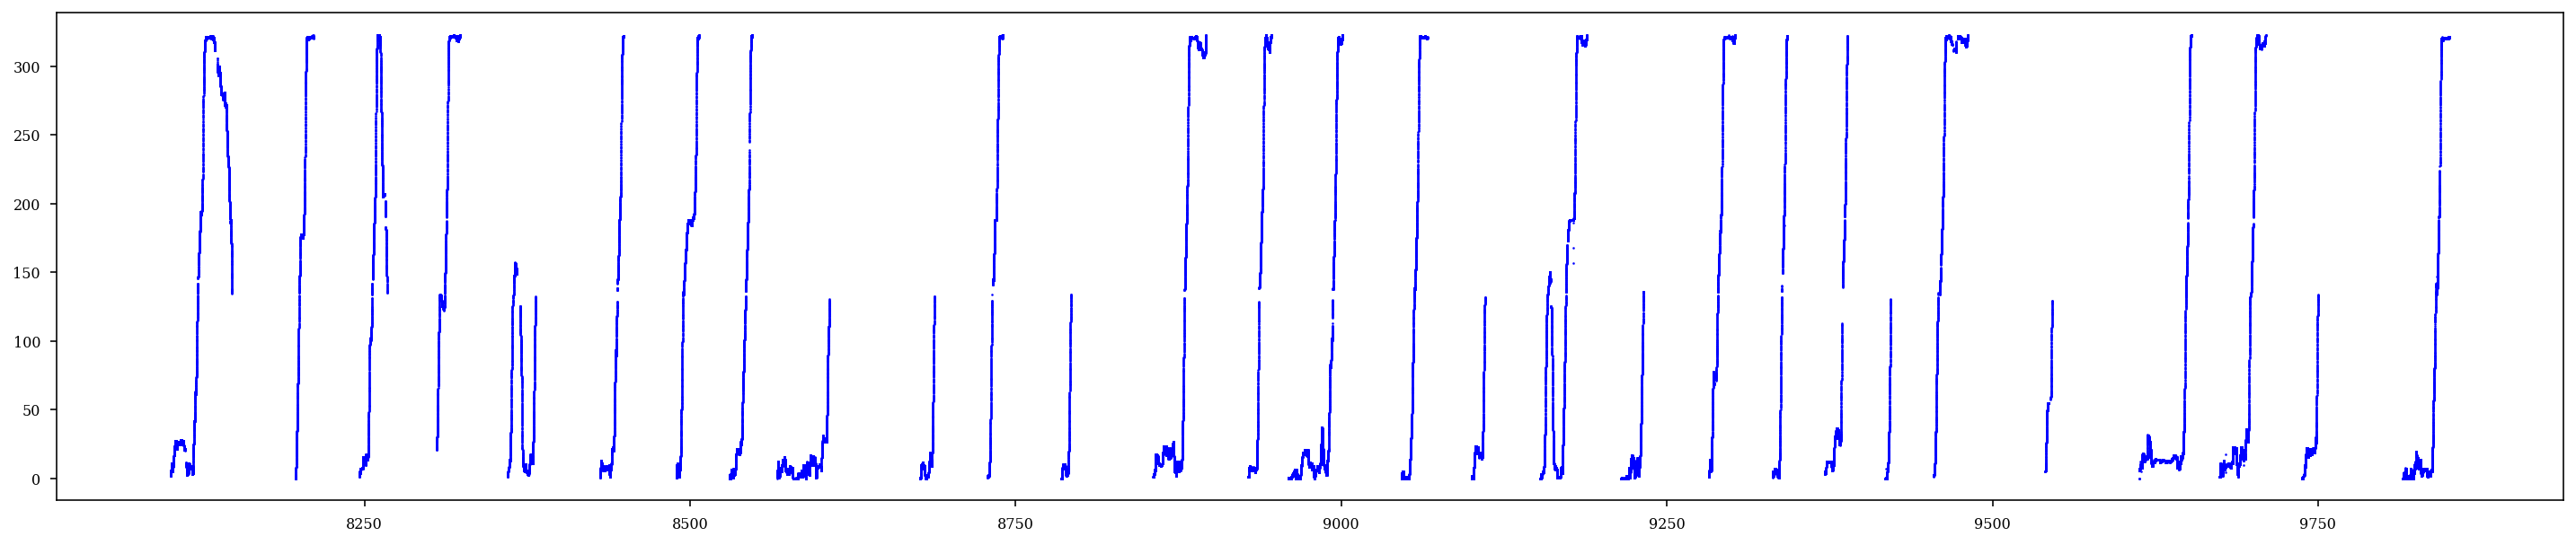

In [63]:
plt.figure(figsize=(25,5))
center_right = center_epochs | right_epochs
center_left = center_epochs | left_epochs
plt.scatter(pos[epochs[2]][outbound_epochs][center_right].abscissa_vals ,pos[epochs[2]][outbound_epochs][center_right].data,color="red",s=1)

plt.figure(figsize=(25,5))

plt.scatter(pos[epochs[2]][outbound_epochs][center_left].abscissa_vals ,pos[epochs[2]][outbound_epochs][center_left].data,color="blue",s=1)

c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


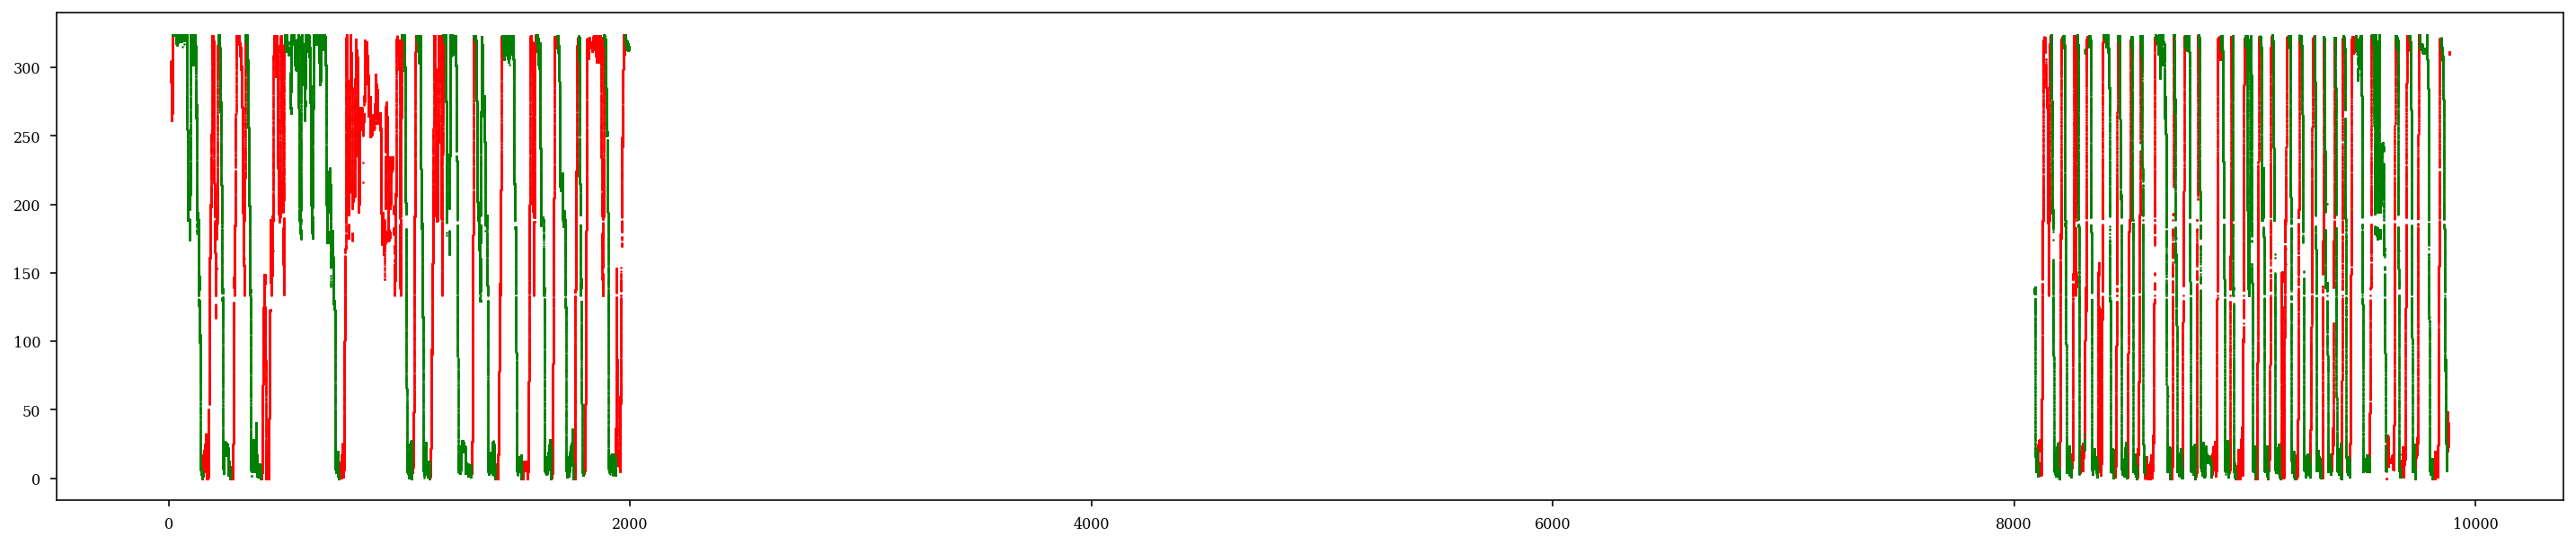

In [32]:
plt.figure(figsize=(25,5))
plt.scatter(pos[outbound_epochs].abscissa_vals ,pos[outbound_epochs].data,color="red",s=1)
plt.scatter(pos[inbound_epochs].abscissa_vals ,pos[inbound_epochs].data,color="green",s=1)

plt.show()

In [234]:
def enter_exit_target(position, target, max_distance=1):
    """Marks when a position has reached a target ("enter")
    and when it has left a target ("exit").
    The position is considered to have reached a target when it is less than
    the `max_distance` from the target.
    Enter and exit times are marked as follows:
     1: entered the target radius
     0: neither
    -1: exited the target radius
    Works for 1D position and 2D position.
    Parameters
    ----------
    position : ndarray, shape (n_time, n_space)
    target : ndarray, shape (1, n_space)
    max_distance : float, optional
        How close the position is to the target to be considered at the target.
    Returns
    -------
    enter_exit : ndarray, shape (n_time,)
    at_target : ndarray, shape (n_time,)
    """
    distance_from_target = paired_distances(position, target)
    at_target = distance_from_target < max_distance
    enter_exit = np.r_[0, np.diff(at_target.astype(float))]
    return enter_exit, at_target


def segment_path(
    time, position, well_locations, max_distance_from_well=10
):
    """Label traversals between each well location.
    Parameters
    ----------
    time : ndarray, shape (n_time,)
    position : ndarray, shape (n_time, n_space)
    well_locations : array_like, shape (n_wells, n_space)
    max_distance_from_well : float, optional
        The animal is considered at a well location if its position is closer
        than this value.
    Returns
    -------
    segments_df : pandas DataFrame, shape (n_segments, 6)
    labeled_segments : pandas DataFrame, shape (n_time,)
    """
    # try:
    #     def time_func(*args, **kwargs):
    #         return time
    #     dio_indicator = get_DIO_indicator(epoch_key, animals, time_func)
    #     well_enter_exit, at_target = np.stack(
    #         [enter_exit_target_dio(
    #             dio_indicator.loc[:, dio_name].values)
    #          for dio_name in _DIO_WELL_ORDER], axis=1)
    # except (FileNotFoundError, TypeError):
    #     logger.warn(
    # 'No DIO file found, using distance from well to segment trials')
    well_enter_exit, at_target = np.stack(
        [
            enter_exit_target(position, np.atleast_2d(well), max_distance_from_well)
            for well in well_locations
        ],
        axis=1,
    )

    n_wells = len(well_locations)
    well_labels = np.arange(n_wells) + 1
    well_enter_exit = np.sum(well_enter_exit.T * well_labels, axis=1)
    shifted_well_enter_exit = shift_well_enters(well_enter_exit)
    is_segment = ~(np.sum(at_target, axis=0) > 0)
    labeled_segments, n_segment_labels = label(is_segment)
    segment_labels = np.arange(n_segment_labels) + 1

    start_time, end_time, duration = [], [], []
    distance_traveled, from_well, to_well = [], [], []

    for segment_label in segment_labels:
        is_seg = np.in1d(labeled_segments, segment_label)
        segment_time = time[is_seg]
        start_time.append(segment_time.min())
        end_time.append(segment_time.max())
        duration.append(segment_time.max() - segment_time.min())
        try:
            start, _, end = np.unique(shifted_well_enter_exit[is_seg])
        except ValueError:
            start, end = np.nan, np.nan

        from_well.append(np.abs(start))
        to_well.append(np.abs(end))
        p = position[is_seg]
        distance_traveled.append(np.sum(paired_distances(p[1:], p[:-1])))

    data = [
        ("start_time", start_time),
        ("end_time", end_time),
        ("duration", duration),
        ("from_well", from_well),
        ("to_well", to_well),
        ("distance_traveled", distance_traveled),
    ]
    index = pd.Index(segment_labels, name="segment")
    return (
        pd.DataFrame.from_dict(dict(data)).set_index(index),
        pd.DataFrame(dict(labeled_segments=labeled_segments), index=time),
    )



well_locations = np.array(
    [
        [
            position_df.query("states == 0").x.mean(),
            position_df.query("states == 0").y.max() - 10,
        ],
        [
            position_df.query("states == 1").x.mean(),
            position_df.query("states == 1").y.max() - 10,
        ],
        [
            position_df.query("states == 2").x.mean(),
            position_df.query("states == 2").y.max() - 10,
        ]
    ]
)
temp_df = position_df[~np.isnan(position_df.x)]
segments_df, labeled_segments = segment_path(
    temp_df["timestamps"].values,
    temp_df[["x", "y"]].values,
    well_locations,
    max_distance_from_well=20,
)
segments_df

,start_time,end_time,duration,from_well,to_well,distance_traveled
segment,,,,,,
1,7.73230,15.43185,7.69955,NaN,NaN,498.129033
2,76.54520,76.55350,0.00830,NaN,NaN,0.057135
3,76.92015,93.46925,16.54910,2.0,2.0,502.173104
4,100.85220,100.89385,0.04165,2.0,2.0,0.410297
5,101.05215,101.78545,0.73330,2.0,2.0,9.477202
...,...,...,...,...,...,...
453,9852.94580,9859.49545,6.54965,3.0,3.0,129.625143
454,9859.59545,9873.12805,13.53260,3.0,1.0,399.713293
455,9877.15285,9877.61945,0.46660,1.0,1.0,8.068933


In [200]:
position_df.query("states == 0").x.mean(), position_df.query("states == 0").y.max()

(-4.525400107879977, 143.48780000000002)

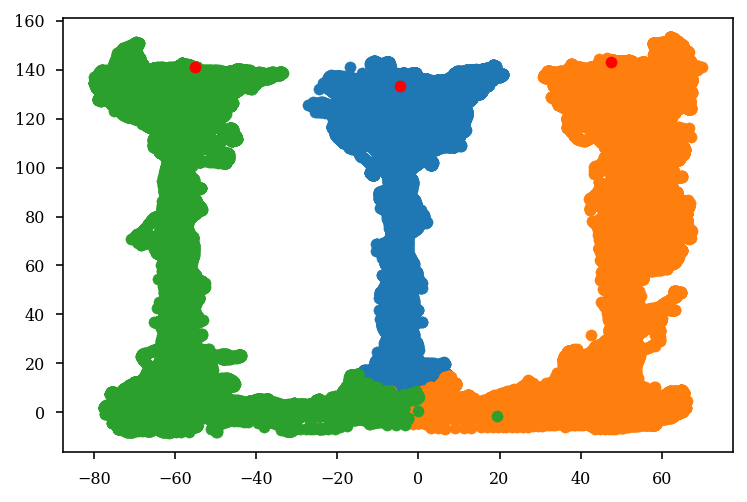

In [205]:
plt.scatter(position_df.query("states == 0").x, position_df.query("states == 0").y)
plt.scatter(position_df.query("states == 0").x.mean(), position_df.query("states == 0").y.max() - 10,color="r")

plt.scatter(position_df.query("states == 1").x, position_df.query("states == 1").y)
plt.scatter(position_df.query("states == 1").x.mean(), position_df.query("states == 1").y.max() - 10,color="r")


plt.scatter(position_df.query("states == 2").x, position_df.query("states == 2").y)
plt.scatter(position_df.query("states == 2").x.mean(), position_df.query("states == 2").y.max() - 10,color="r")


In [195]:
position_df.query("states == 0")

,time,x,y,z,linearized,units,projected_x,projected_y,sr,timestamps,speed,acceleration,states,epochs,environment
0,2.79925,NaN,NaN,19.3239,NaN,cm,NaN,NaN,119.760479,2.79925,5.304503,0.000000,NaN,OR15day1_1_180116_095729,wmaze
1,2.80755,NaN,NaN,19.3147,NaN,cm,NaN,NaN,119.760479,2.80755,5.142359,-0.162144,NaN,OR15day1_1_180116_095729,wmaze
2,2.81590,NaN,NaN,19.3118,NaN,cm,NaN,NaN,119.760479,2.81590,4.897786,-0.244573,NaN,OR15day1_1_180116_095729,wmaze
3,2.82425,NaN,NaN,19.2998,NaN,cm,NaN,NaN,119.760479,2.82425,4.899227,0.001441,NaN,OR15day1_1_180116_095729,wmaze
4,2.83255,NaN,NaN,19.2957,NaN,cm,NaN,NaN,119.760479,2.83255,4.660540,-0.238687,NaN,OR15day1_1_180116_095729,wmaze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455392,9890.38545,NaN,NaN,NaN,NaN,cm,NaN,NaN,119.760479,9890.38545,NaN,NaN,NaN,OR15day1_2_180116_171020,wmaze
455393,9890.39375,NaN,NaN,NaN,NaN,cm,NaN,NaN,119.760479,9890.39375,NaN,NaN,NaN,OR15day1_2_180116_171020,wmaze
455394,9890.40210,NaN,NaN,NaN,NaN,cm,NaN,NaN,119.760479,9890.40210,NaN,NaN,NaN,OR15day1_2_180116_171020,wmaze
455395,9890.41045,NaN,NaN,NaN,NaN,cm,NaN,NaN,119.760479,9890.41045,NaN,NaN,NaN,OR15day1_2_180116_171020,wmaze


In [193]:
import numpy as np
import pandas as pd
from scipy.ndimage.measurements import label


def paired_distances(x, y):
    '''Euclidean distance between x and y at each time point.
    Parameters
    ----------
    x,y : ndarray, shape (n_time, n_space)
    Returns
    -------
    distance : ndarray, shape (n_time,)
    '''
    x, y = np.array(x), np.array(y)
    x = np.atleast_2d(x).T if x.ndim < 2 else x
    y = np.atleast_2d(y).T if y.ndim < 2 else y
    return np.linalg.norm(x - y, axis=1)


def enter_exit_target(position, target, max_distance=1):
    '''Marks when a position has reached a target ("enter")
    and when it has left a target ("exit").
    The position is considered to have reached a target when it is less than
    the `max_distance` from the target.
    Enter and exit times are marked as follows:
     1: entered the target radius
     0: neither
    -1: exited the target radius
    Works for 1D position and 2D position.
    Parameters
    ----------
    position : ndarray, shape (n_time, n_space)
    target : ndarray, shape (1, n_space)
    max_distance : float, optional
        How close the position is to the target to be considered at the target.
    Returns
    -------
    enter_exit : ndarray, shape (n_time,)
    at_target : ndarray, shape (n_time,)
    '''
    distance_from_target = paired_distances(position, target)
    at_target = distance_from_target < max_distance
    enter_exit = np.r_[0, np.diff(at_target.astype(float))]
    return enter_exit, at_target


def shift_well_enters(enter_exit):
    '''Shifts the enter times back one time point.'''
    shifted_enter_exit = enter_exit.copy()
    old_ind = np.where(enter_exit > 0)[0]  # positive entries are well-entries
    new_ind = old_ind - 1
    shifted_enter_exit[new_ind] = enter_exit[old_ind]
    shifted_enter_exit[old_ind] = 0
    return shifted_enter_exit


def segment_path(time, position, well_locations, max_distance_from_well=10):
    '''Label traversals between each well location.
    Parameters
    ----------
    time : ndarray, shape (n_time,)
    position : ndarray, shape (n_time, n_space)
    well_locations : array_like, shape (n_wells, n_space)
    max_distance_from_well : float, optional
        The animal is considered at a well location if its position is closer
        than this value.
    Returns
    -------
    segments_df : pandas DataFrame, shape (n_segments, 6)
    labeled_segments : pandas DataFrame, shape (n_time,)
    '''
    n_wells = len(well_locations)
    well_enter_exit, at_target = np.stack(
        [enter_exit_target(position, np.atleast_2d(well),
                           max_distance_from_well)
         for well in well_locations], axis=1)

    well_labels = np.arange(n_wells) + 1
    well_enter_exit = np.sum(well_enter_exit.T * well_labels, axis=1)
    shifted_well_enter_exit = shift_well_enters(well_enter_exit)
    is_segment = ~(np.sum(at_target, axis=0) > 0)
    labeled_segments, n_segment_labels = label(is_segment)
    segment_labels = np.arange(n_segment_labels) + 1

    start_time, end_time, duration = [], [], []
    distance_traveled, from_well, to_well = [], [], []

    for segment_label in segment_labels:
        is_seg = np.in1d(labeled_segments, segment_label)
        segment_time = time[is_seg]
        start_time.append(segment_time.min())
        end_time.append(segment_time.max())
        duration.append(segment_time.max() - segment_time.min())
        try:
            start, _, end = np.unique(shifted_well_enter_exit[is_seg])
        except ValueError:
            start, end = np.nan, np.nan

        from_well.append(np.abs(start))
        to_well.append(np.abs(end))
        p = position[is_seg]
        distance_traveled.append(np.sum(paired_distances(p[1:], p[:-1])))

    data = [('start_time', start_time), ('end_time', end_time),
            ('duration', duration), ('from_well', from_well),
            ('to_well', to_well),
            ('distance_traveled', distance_traveled)]
    index = pd.Index(segment_labels, name='segment')
    return (pd.DataFrame.from_items(data).set_index(index),
            pd.DataFrame(dict(labeled_segments=labeled_segments), index=time))


def find_last_non_center_well(segments_df, segment_ind):
    last_wells = segments_df.iloc[:segment_ind].to_well
    try:
        return last_wells[last_wells != 'center'].iloc[-1]
    except IndexError:
        # There are no non-center wells. Just return current well.
        return ''


def get_correct_inbound_outbound(segments_df):
    n_segments = segments_df.shape[0]
    task = np.empty((n_segments,), dtype=object)
    is_correct = np.empty((n_segments,), dtype=bool)

    for segment_ind in np.arange(n_segments):
        if segments_df.iloc[segment_ind].from_well == 'center':
            task[segment_ind] = 'Outbound'
            is_correct[segment_ind] = (
                segments_df.iloc[segment_ind].to_well !=
                find_last_non_center_well(segments_df, segment_ind))
        else:
            task[segment_ind] = 'Inbound'
            is_correct[segment_ind] = (
                segments_df.iloc[segment_ind].to_well == 'center')

    segments_df['task'] = task
    segments_df['is_correct'] = is_correct

    return segments_df


def score_inbound_outbound(segments_df, min_distance_traveled=100):
    '''In the alternating arm task, determines whether the trial should be
    inbound (running to the center arm) or outbound (running to the opposite
    outer arm as before) and if the trial was performed correctly.
    Parameters
    ----------
    segments_df : pandas DataFrame
        Output of `segment_path` function.
    min_distance_traveled : float, optional
        Minimum path length (in cm) while outside of the well radius for
        a segment to be considered as a trial.
    Returns
    -------
    segments_df : pandas DataFrame
        Same as the input dataframe but with the wells labeled
        (left, right, center) and columns for `task` (inbound/outbound) and
        `is_correct` (True/False).
    '''
    segments_df = (segments_df.copy()
                   .loc[segments_df.distance_traveled > min_distance_traveled]
                   .dropna())
    WELL_NAMES = {
        1: 'center',
        2: 'left',
        3: 'right'
    }
    segments_df = segments_df.assign(
        to_well=lambda df: df.to_well.map(WELL_NAMES),
        from_well=lambda df: df.from_well.map(WELL_NAMES))
    return get_correct_inbound_outbound(segments_df)

In [235]:
segments_df = score_inbound_outbound(segments_df, min_distance_traveled=100)
segments_df

,start_time,end_time,duration,from_well,to_well,distance_traveled,task,is_correct
segment,,,,,,,,
3,76.92015,93.46925,16.54910,left,left,502.173104,Inbound,False
8,115.32640,136.57525,21.24885,left,center,658.290961,Inbound,True
20,170.80670,185.88085,15.07415,center,right,432.595670,Outbound,True
21,193.57210,211.82110,18.24900,right,left,666.281748,Inbound,False
22,219.95400,234.44485,14.49085,left,center,447.015686,Inbound,True
...,...,...,...,...,...,...,...,...
442,9747.56820,9753.00125,5.43305,center,left,364.956181,Outbound,True
445,9791.19085,9800.39035,9.19950,left,center,383.639372,Inbound,True
451,9838.02160,9844.44625,6.42465,center,right,387.233437,Outbound,True


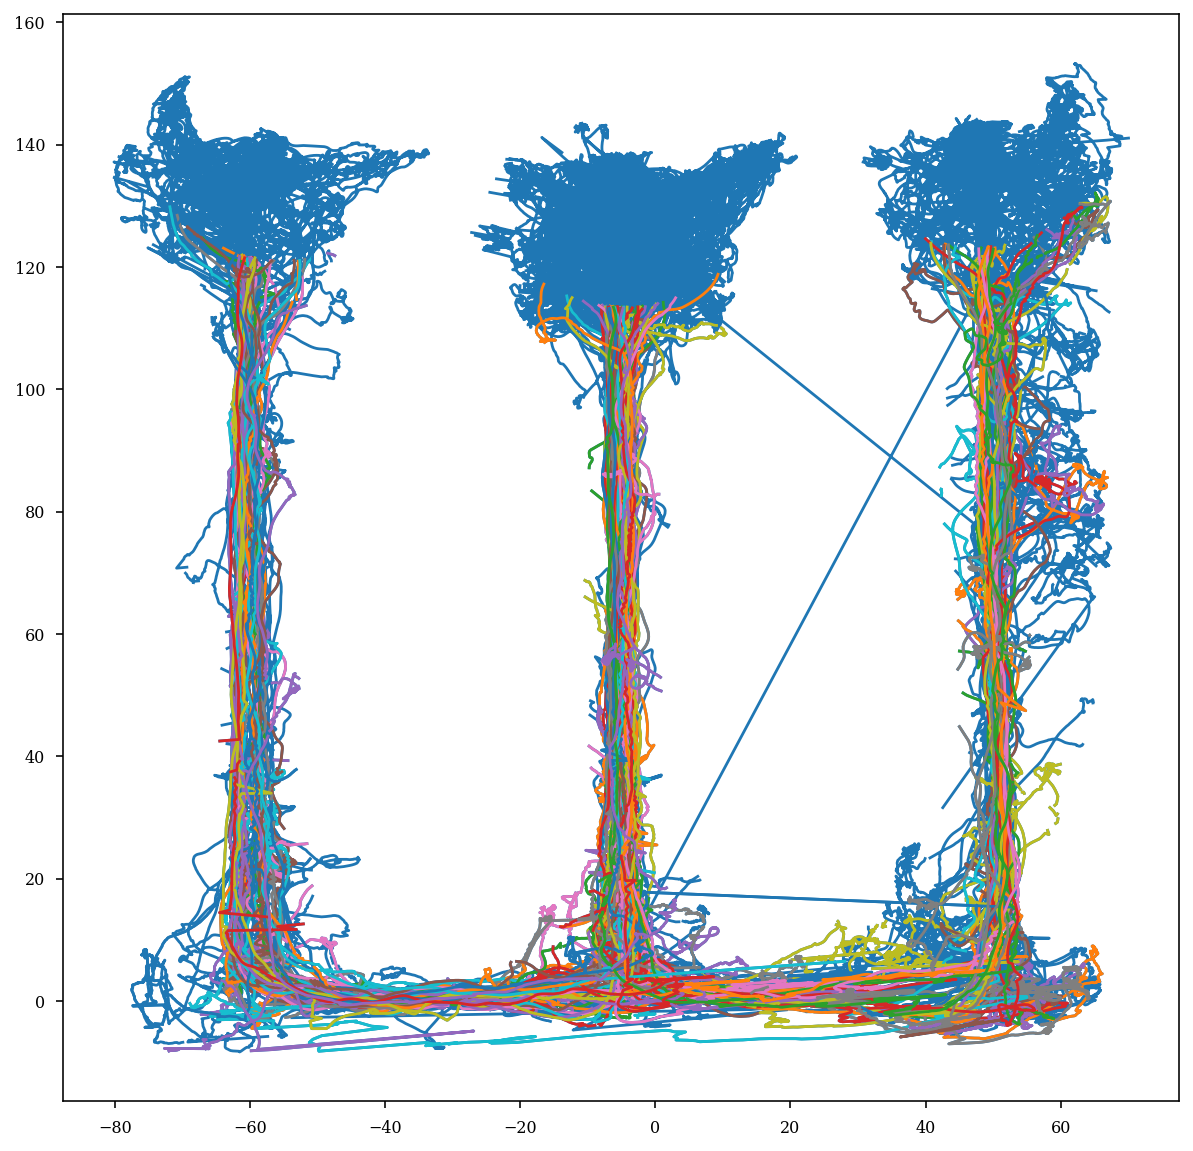

In [236]:
plt.figure(figsize=(10, 10))
plt.plot(position_df.x, position_df.y)
for ep in segments_df.query("is_correct == True").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    plt.plot(
        position_df[idx].x,
        position_df[idx].y,
    )

# position_df.query('timestamps >=631.39810 & timestamps <=641.21425').plot(x='x', y='y')


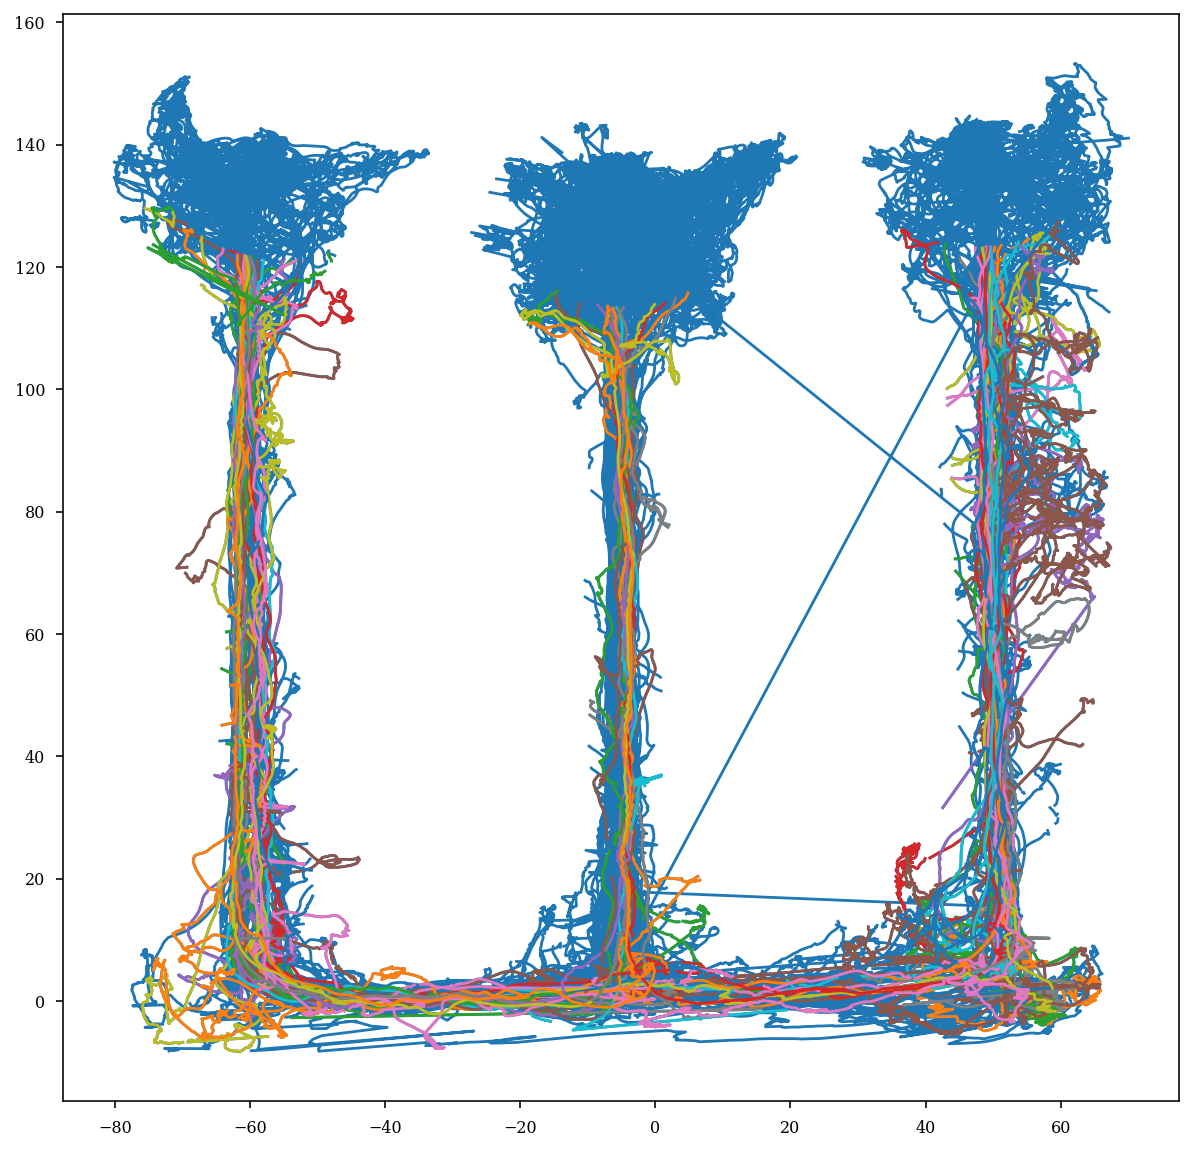

In [239]:
plt.figure(figsize=(10, 10))
plt.plot(position_df.x, position_df.y)
for ep in segments_df.query("is_correct == False").itertuples():
    # position_df.timestamps.between_time(ep.start_time, ep.end_time)
    idx = (position_df.timestamps >= ep.start_time) & (position_df.timestamps <= ep.end_time)
    plt.plot(
        position_df[idx].x,
        position_df[idx].y,
    )